In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
url = '../../../Gudang/mpg.csv'

df_mpg = pd.read_csv(url)

In [4]:
df_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
df_mpg.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [6]:
df_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [7]:
df_mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [8]:
df_mpg.shape

(398, 9)

In [9]:
df_mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

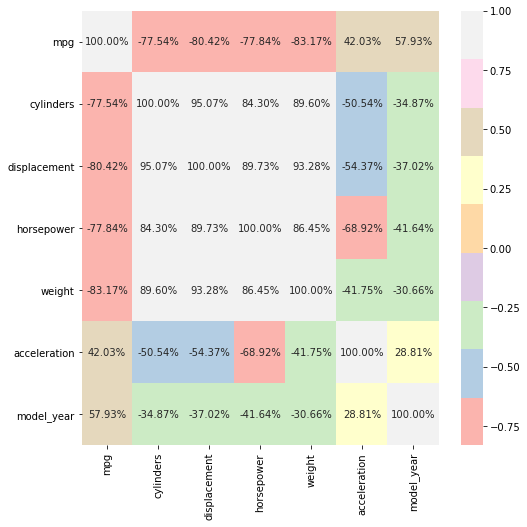

In [10]:
corr = df_mpg.corr()

plt.figure(figsize=(8,8))

ax = sns.heatmap(corr,annot=True,fmt='.2%',cmap='Pastel1')

### Exploratory Data Analysis

In [11]:
df_mpg['name'].head()

0    chevrolet chevelle malibu
1            buick skylark 320
2           plymouth satellite
3                amc rebel sst
4                  ford torino
Name: name, dtype: object

In [12]:
company = []

for name in df_mpg['name']:
    comp = name.split(" ")[0]
    company.append(comp)
    
df_mpg['company'] = company
df_mpg.drop('name',1,inplace=True)

In [13]:
df_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,company
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford


In [14]:
df_mpg.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,company
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy


### Q1 : Negara mana yang paling banyak membuat mobil ?

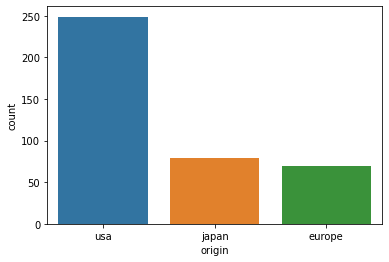

In [15]:
ax = sns.countplot(x='origin',data=df_mpg)

### Q2 : Merek mobil apa yang paling banyak ?

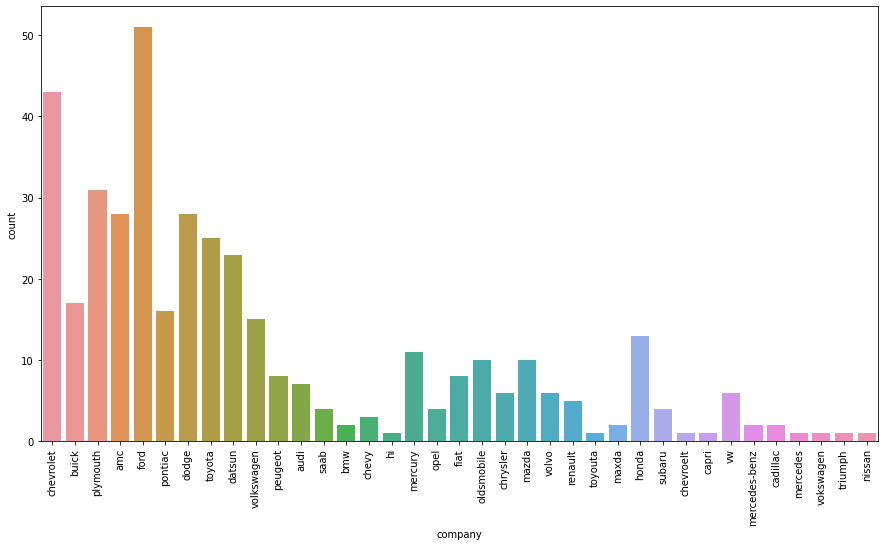

In [16]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='company',data=df_mpg)
plt.xticks(rotation=90)
plt.show()

### Q3: Jelaskan hubungan horsepower dan weight !

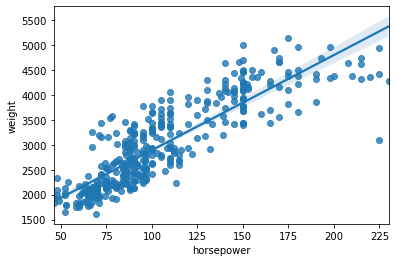

In [17]:
ax = sns.regplot(x='horsepower',y='weight',data=df_mpg)

### Q4: Horsepower vs Acceleration

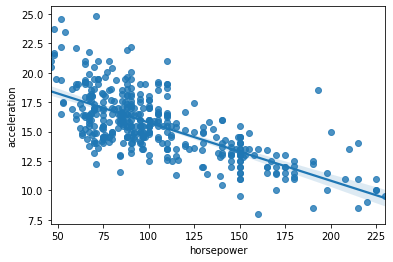

In [18]:
ax = sns.regplot(x='horsepower',y='acceleration',data=df_mpg)

### Q5: Persebaran Data mpg

In [26]:
def stat_hist_desc(column: pd.Series, data: pd.DataFrame):

    """Fungsi untuk menampilkan Histogram beserta informasi tentang Mean, Median, Standard Deviasi

    >>> stat_hist_desc(x='acceleration',data=df_mpg) # doctest: +SKIP
    """

    ax = sns.histplot(x=column, data=data)

    plt.axvline(
        np.mean(column.astype(np.float)),
        color="r",
        linestyle="--",
        linewidth=1.5,
        label="Mean = {:.2f}".format(np.mean(column)),
    )
    plt.axvline(
        np.median(column),
        color="b",
        linestyle="--",
        linewidth=1.5,
        label="Median = {:.2f}".format(np.median(column)),
    )
    plt.axvline(
        np.std(column),
        color="y",
        linestyle="--",
        linewidth=1.5,
        label="Std.Dev ={:.2f}".format(np.std(column)),
    )

    plt.legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.15),
        ncol=3,
        fancybox=True,
        shadow=True,
    )
    plt.show()

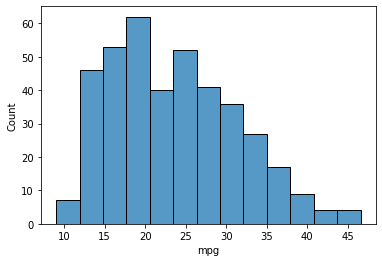

In [19]:
ax = sns.histplot(x='mpg',data=df_mpg)

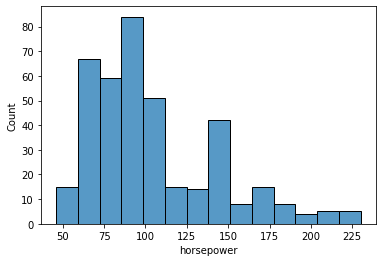

In [20]:
ax = sns.histplot(x='horsepower',data=df_mpg)

AttributeError: 'str' object has no attribute 'astype'

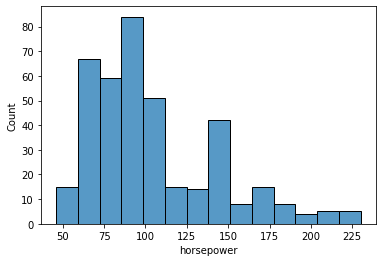

In [27]:
stat_hist_desc(column='horsepower',data=df_mpg)

### Q6: Persebaran Data Acceleration